In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
train_data = pd.read_csv("./Data/train.csv")
test_data = pd.read_csv("./Data/test.csv")
train_data = train_data.drop(columns=["Name", "Ticket", "Cabin", "Embarked"])
test_data = test_data.drop(columns=["Name", "Ticket", "Cabin", "Embarked"])

train_data["Sex"] = train_data["Sex"].replace(["male"], 0)
train_data["Sex"] = train_data["Sex"].replace(["female"], 1)

test_data["Sex"] = test_data["Sex"].replace(["male"], 0)
test_data["Sex"] = test_data["Sex"].replace(["female"], 1)

In [9]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


<Axes: >

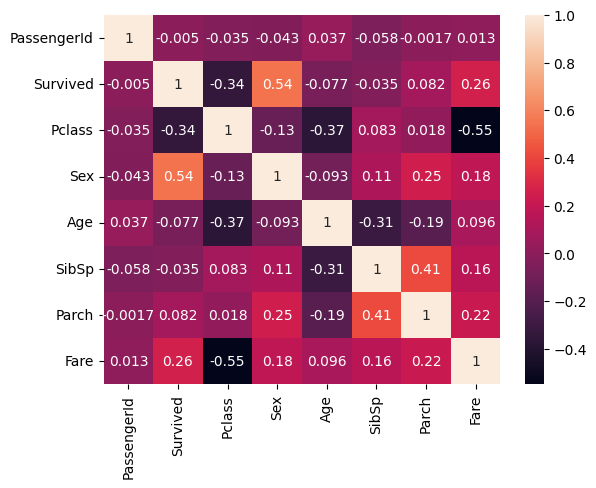

In [4]:
sns.heatmap(train_data.corr(), annot = True)
# Notable Features: Sex and PClass

In [10]:
features = ["Pclass", "Sex", ]
Y = train_data["Survived"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [11]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,Y)

RandomForestClassifier(max_depth=5, random_state=1)

In [13]:
predictions = model.predict(X_test)
output = pd.DataFrame({"PassengerId": test_data.PassengerId, "Survived":predictions})
output.to_csv("submission.csv", index = False)

In [14]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,